# 实验结果绘制
> 本脚本仅用于方便快速绘制训练曲线，而无需打开tensorboard（占用高内存）

读取一个exp目录下，根据超参平均所有的不同种子的数据，画出均值、标准差曲线

In [2]:
from marlpo.utils.plot import *
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind')
c = sns.color_palette("colorblind")

python(85034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## IPPO


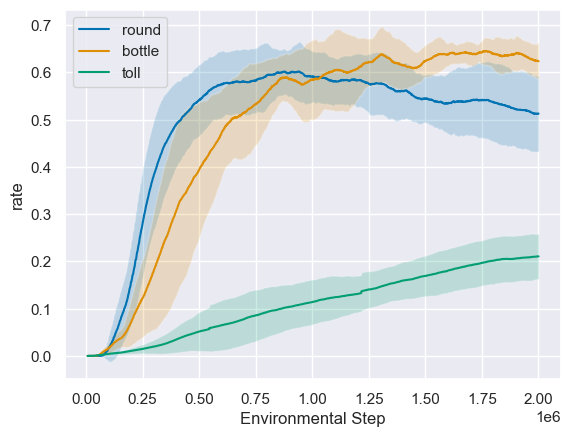

In [7]:
ippo_dirs = {
    'round': 'exp_IPPO/IPPO_Round_40agents',
    'bottle': 'exp_IPPO/IPPO_Bottn_20agents',
    'toll': 'exp_IPPO/IPPO_Tollg_40agents',
}
for key, d in ippo_dirs.items():
    plot_one_exp(d, exp_label=key)

### Inter

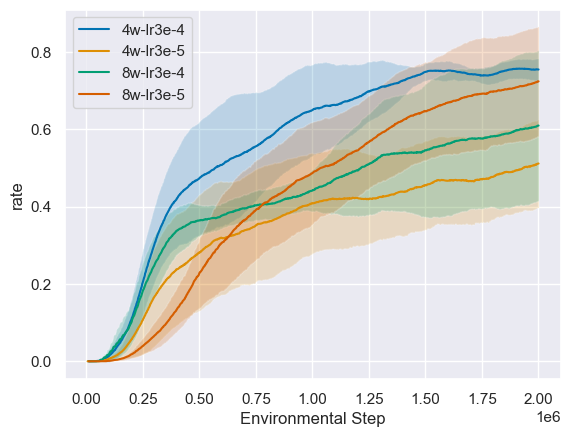

In [2]:
ippo_dirs = {
    '4w-lr3e-4': 'exp_IPPO/IPPO_Inter_30agents_4workers_2M_lr=3e-4',
    '4w-lr3e-5': 'exp_IPPO/IPPO_Inter_30agents_4workers_2M_lr=3e-5',
    '8w-lr3e-4': 'exp_IPPO/IPPO_Inter_30agents_8workers_2M_lr=3e-4',
    '8w-lr3e-5': 'exp_IPPO/IPPO_Inter_30agents_8workers_2M_lr=3e-5', # ~70%
}
for key, d in ippo_dirs.items():
    plot_one_exp(d, exp_label=key)

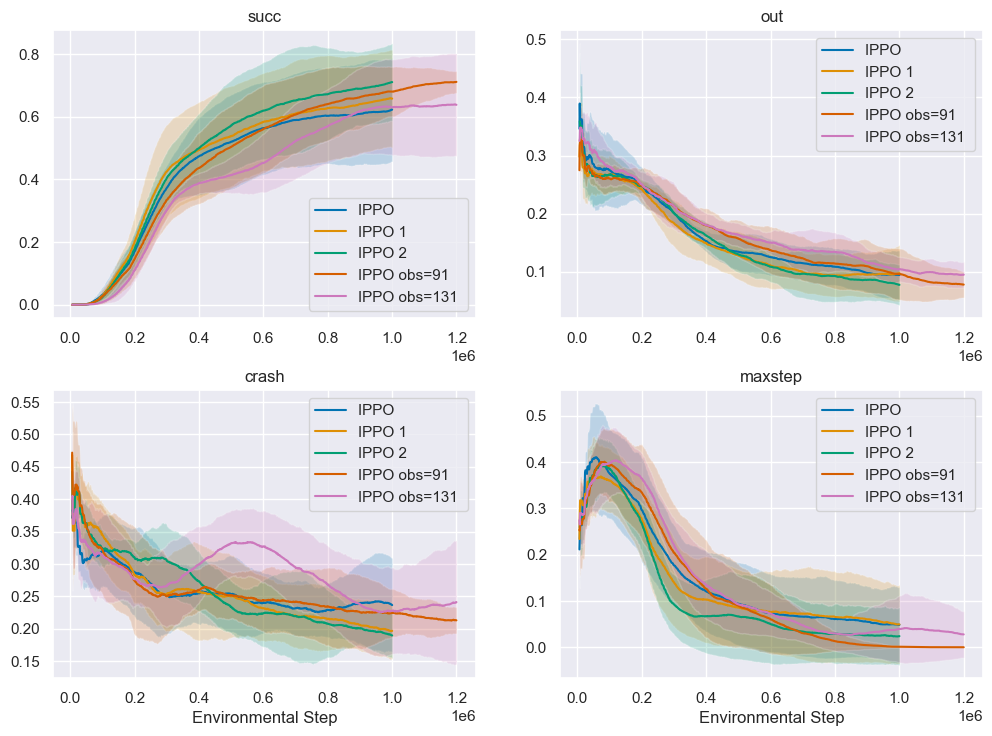

In [4]:
trial_1 = 'exp_results/IPPO_Intersection_8seeds_30agents'
trial_2 = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat' # BEST
trial_3 = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'
aiboy_1 = 'exp_baselines/IPPO_Inter_4agents_(8_seeds)(4_workers)'
aiboy_2 = 'exp_baselines/IPPO_Inter_4agents_(8_seeds)(4_workers)(4others)'

exps = {
    trial_1: dict(
        algo_name='IPPO',
    ),
    trial_2: dict(
        algo_name='IPPO 1',
    ),
    trial_3: dict(
        algo_name='IPPO 2',
    ),
    aiboy_1: dict(
        algo_name='IPPO obs=91',
    ),
    aiboy_2: dict(
        algo_name='IPPO obs=131',
    ),
}

compare_all_metrics_for_multi_experiments(exps)

## CCPPO

In [18]:
def plot_ccppo(d, label, fuse_mode=None):
    if fuse_mode == 'all':
        for p in ['concat', 'mf']:
            plot_one_exp(d, exp_label=label+'-'+p, param_pattern=p)
    elif fuse_mode in ['concat', 'mf']:
        plot_one_exp(d, exp_label=label+'-'+fuse_mode, param_pattern=fuse_mode)
    else:
        plot_one_exp(d, exp_label=label)

### Inter.


#### 1. 4w lr=3e-4

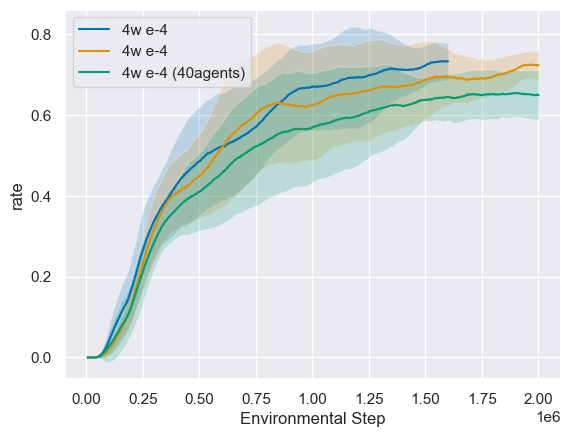

In [5]:
d1 = 'exp_CCPPO/CCPPO_Inter_30agents_4workers_1.6M_concat_lr=3e-4'
d1_2m = 'exp_CCPPO/CCPPO_Inter_30agents_4workers_2M_concat_lr=3e-4'
d1_40a = 'exp_CCPPO/CCPPO_Inter_40agents_4workers_2M_concat_lr=3e-4'
plot_ccppo(d1, '4w e-4')
plot_ccppo(d1_2m, '4w e-4')
plot_ccppo(d1_40a, '4w e-4 (40agents)')

#### 3. 8w lr=3e-4

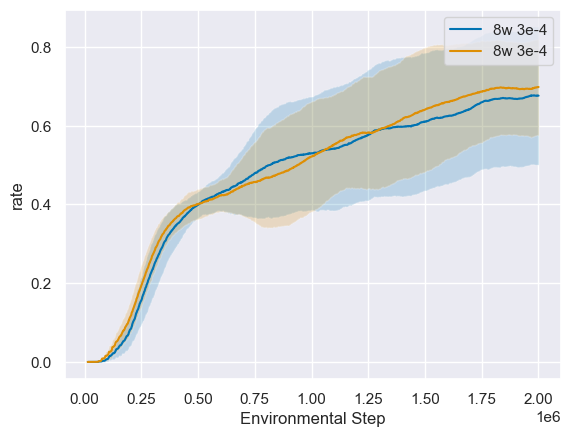

In [21]:
ccppo_8w_e4 = 'exp_CCPPO/CCPPO_Inter_30agents_8workers_2M_concat_mf_lr=3e-4'
plot_ccppo(ccppo_8w_e4, '8w 3e-4', 'all')

#### 4. 8w lr=3e-5

### concat + mf | 4/8w | lr e-4/e-5

In [23]:
ccppo_all_dirs = {
    '4w e-4': ['exp_CCPPO/CCPPO_Inter_30agents_4workers_2M_concat_lr=3e-4', None],
    '4w e-5': ['exp_CCPPO/CCPPO_Inter_30agents_4workers_2M_lr=3e-5', 'concat'],
    '8w e-4': ['exp_CCPPO/CCPPO_Inter_30agents_8workers_2M_concat_mf_lr=3e-4', 'concat'],
    '8w e-5': ['exp_CCPPO/CCPPO_Inter_30agents_8workers_2M_concat_mf_lr=3e-5', 'concat'],
}

##### concat

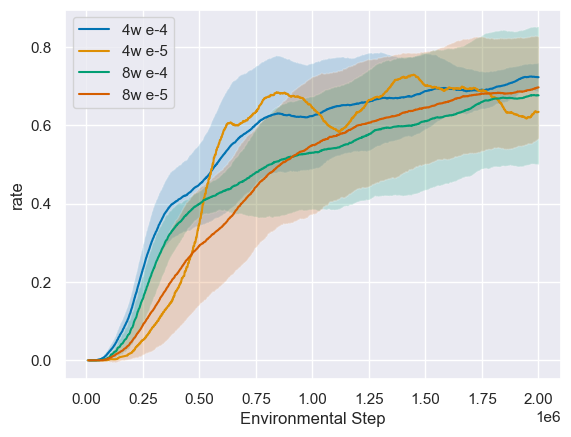

In [24]:
for l, (d, fuse_mode) in ccppo_all_dirs.items():
    plot_ccppo(d, l, fuse_mode)

### Roundabout

4w e-4

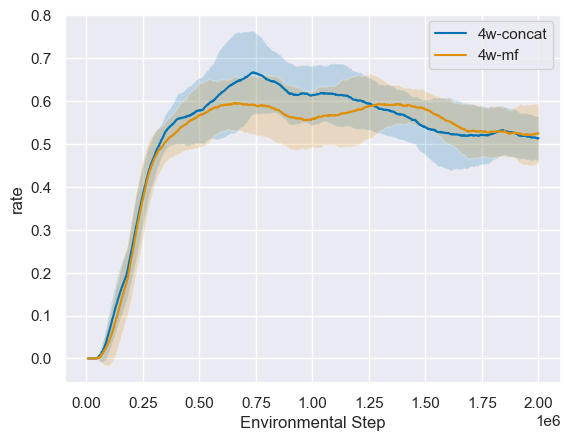

In [24]:
cc_round_4w = 'exp_CCPPO/CCPPO_Round_40agents_4workers_2M_concat+mf_4seeds_lr=3e-4'
plot_ccppo(cc_round_4w, '4w', fuse_mode='all')

4w e-5

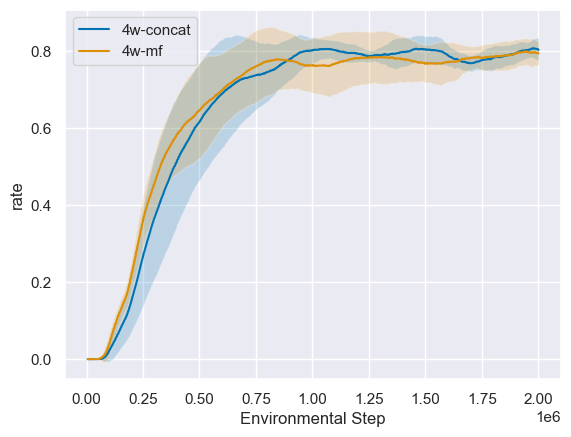

In [25]:
cc_ro_4w = 'exp_CCPPO/CCPPO_Round_40agents_4workers_2M_concat+mf_8seeds_lr=3e-5'
plot_ccppo(cc_ro_4w, '4w', fuse_mode='all')
# plot_sep_mean(cc_ro_4w)

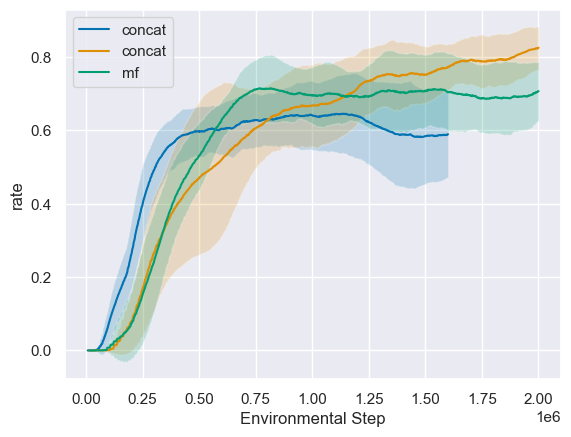

In [31]:
ccppo_round = 'exp_CCPPO/CCPPO_Round_40agents_concat_4workers_1.6M_lr=3e-4'
plot_one_exp(ccppo_round, exp_label='4w_e-4_concat')

ccppo_round_2m = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_lr=3e-5'
for p in ['concat', 'mf']:
    plot_one_exp(ccppo_round_2m, param_pattern=p, exp_label=p)

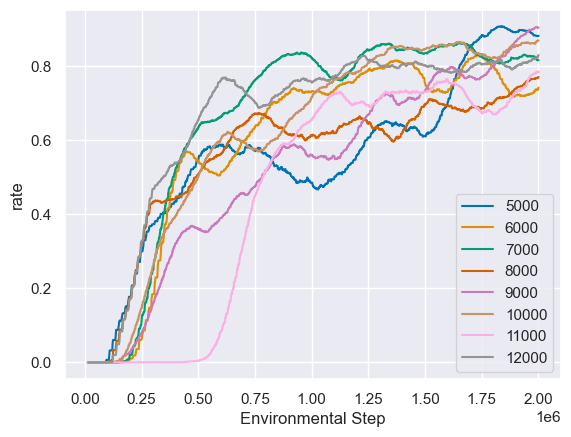

In [2]:
ccppo_round_2m = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_concat+mf_lr=3e-5'
seeds = [i*1000 for i in range(5, 13)]
for s in seeds:
    plot_one_exp(ccppo_round_2m, seeds=s, exp_label=f'{s}', param_pattern='concat')

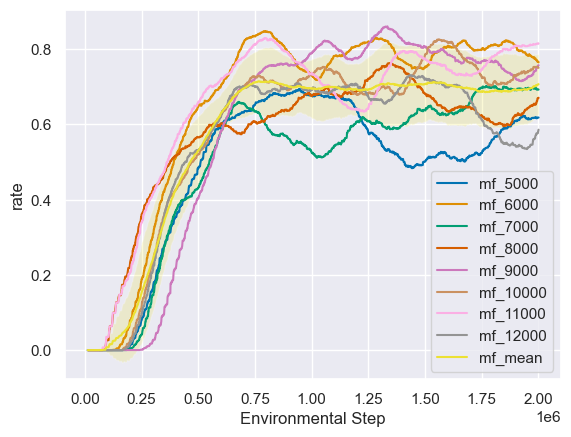

In [6]:
ccppo_round_2m = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_concat+mf_8seeds_lr=3e-5'
plot_sep_mean(ccppo_round_2m, p='mf')

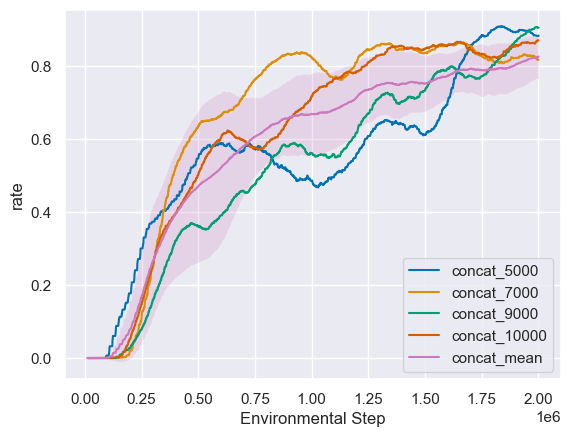

In [3]:
plot_sep_mean(ccppo_round_2m, p='concat', seeds=[5000, 7000, 9000, 10000])

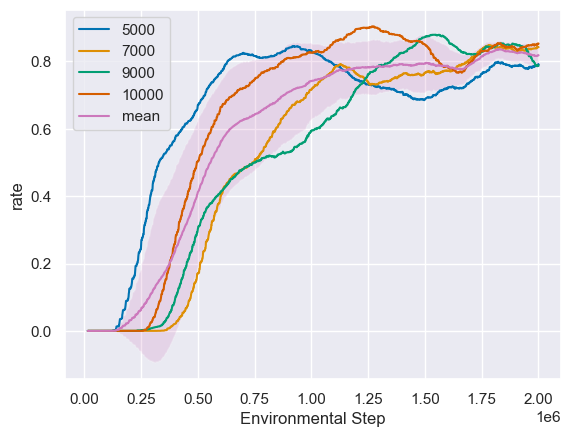

In [12]:
cc_round_ = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_concat_4seeds_lr=3e-5'
plot_sep_mean(cc_round_, )

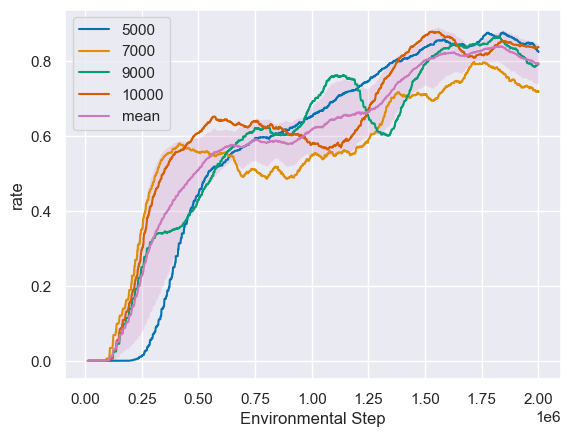

In [5]:
cc_concat_round = 'exp_CCPPO/CCPPO_Round_40agents_8workers_concat_2M_lr=3e-5'
plot_sep_mean(cc_concat_round)

4w 4-5:

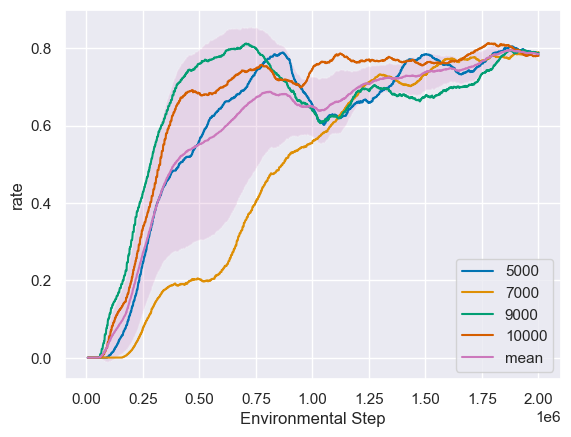

In [6]:
cc4w= 'exp_CCPPO/CCPPO_Round_40agents_4workers_2M_concat_4seeds_lr=3e-5'
plot_sep_mean(cc4w)

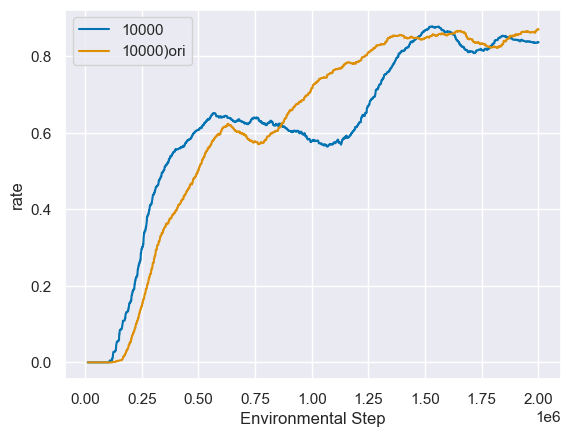

In [97]:
cc_concat_round = 'exp_CCPPO/CCPPO_Round_40agents_8workers_concat_2M_lr=3e-5'
seeds = [5000, 7000, 9000, 10000]
seeds = [10000,]
for s in seeds:
    plot_one_exp(cc_concat_round, seeds=s, exp_label=f'{s}')
ccppo_round_2m = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_lr=3e-5'
for s in seeds:
    plot_one_exp(ccppo_round_2m, seeds=s, exp_label=f'{s})ori', param_pattern='concat')

#### MF

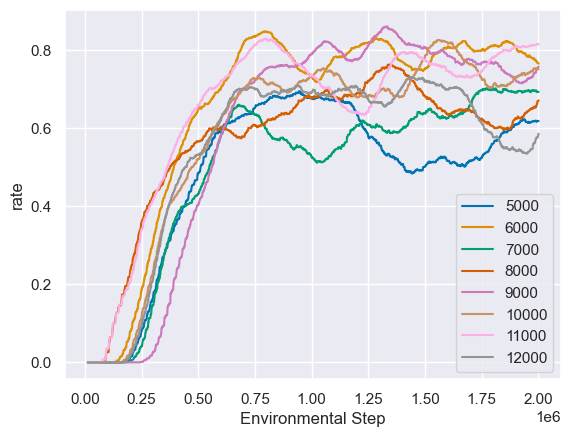

In [37]:
ccppo_round_2m = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_lr=3e-5'
seeds = [i*1000 for i in range(5, 13)]
for s in seeds:
    plot_one_exp(ccppo_round_2m, seeds=s, exp_label=f'{s}', param_pattern='mf')

#### 1M

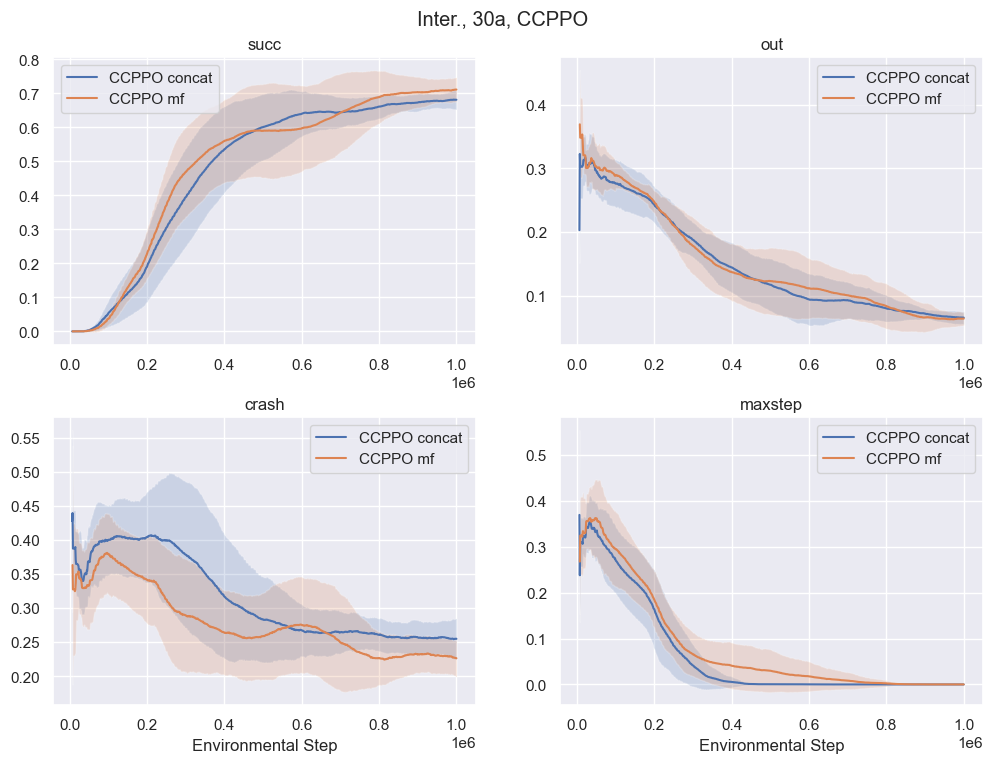

In [ ]:
exp_dir = 'exp_results/CCPPO_Intersection_8seeds_30agents'
param_space = {
    'fuse_mode': [['concat', 'mf'], ['concat', 'mf']],
}
param_pattern_dict = get_param_pattern(param_space) # {lable -> re pattern}

compare_all_metrics_in_one_experiment(exp_dir=exp_dir, algo_name='CCPPO', param_pattern_dict=param_pattern_dict, title='Inter., 30a, CCPPO')

## CoPO

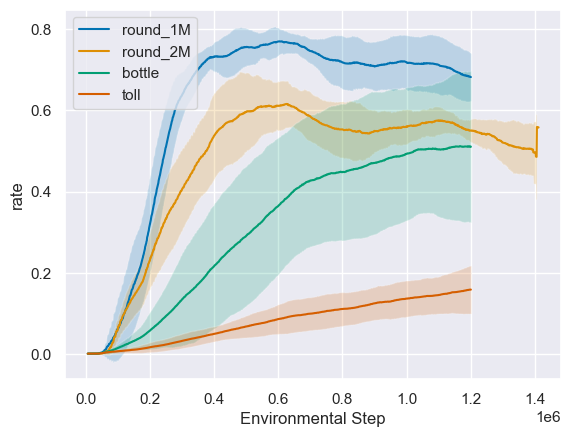

In [37]:
copo_dirs = {
    'round_1M': 'exp_CoPO/CoPO_Round_30agents_1M',
    'round_2M': 'exp_CoPO/CoPO_Round_40agents_4workers_2M',
    'bottle': 'exp_CoPO/CoPO_Bottle_30agents_1M',
    'toll': 'exp_CoPO/CoPO_Tollgate_30agents_1M',
}
for key, d in copo_dirs.items():
    plot_one_exp(d, exp_label=key)


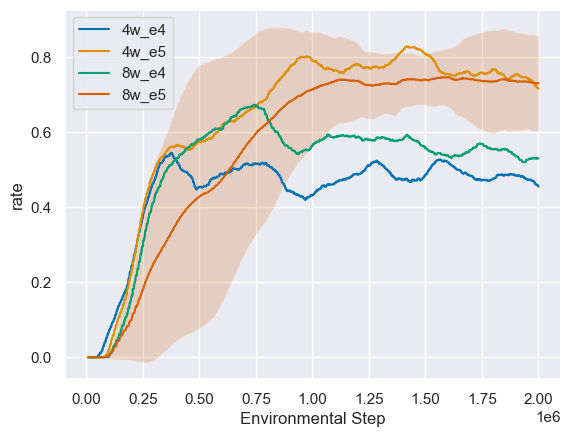

In [3]:
copo_r = {
    '4w_e4': 'exp_CoPO/CoPO_Round_40agents_4workers_2M_lr=3e-4[Mac]',
    '4w_e5': 'exp_CoPO/CoPO_Round_40agents_4workers_2M_lr=3e-5[Mac]',
    '8w_e4': 'exp_CoPO/CoPO_Round_40agents_8workers_2M_lr=3e-4[Mac]',
    '8w_e5': 'exp_CoPO/CoPO_Round_40agents_8workers_2M_lr=3e-5[Mac]'
}
for k, d in copo_r.items():
    plot_one_exp(d, exp_label=k)


### Inter

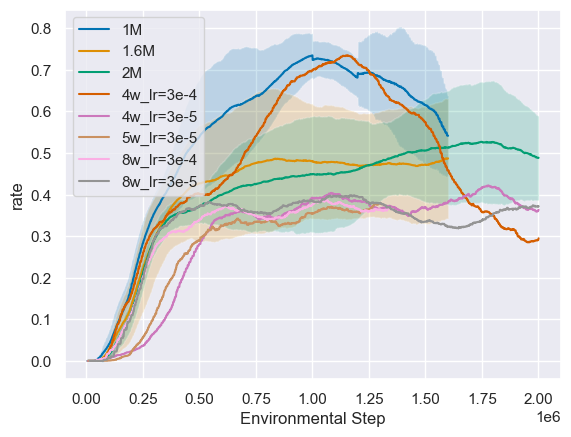

In [4]:
copo_dirs_inter = {
    '1M': 'exp_CoPO/CoPO_Inter_30agents_1M_lr=3e-4',
    '1.6M': 'exp_CoPO/CoPO_Inter_30agents_0',
    '2M': 'exp_CoPO/CoPO_Inter_30agents_2M',

    '4w_lr=3e-4': 'exp_CoPO/CoPO_Inter_30agents_4workers_2M_lr=3e-4',
    '4w_lr=3e-5': 'exp_CoPO/CoPO_Inter_30agents_4workers_2M_lr=3e-5',

    '5w_lr=3e-5': 'exp_CoPO/CoPO_Inter_30agents_5workers_2M',

    '8w_lr=3e-4': 'exp_CoPO/CoPO_Inter_30agents_8workers_2M',
    '8w_lr=3e-5': 'exp_CoPO/CoPO_Inter_30agents_8workers_2M_lr=3e-5',
}
for key, d in copo_dirs_inter.items():
    plot_one_exp(d, exp_label=key)


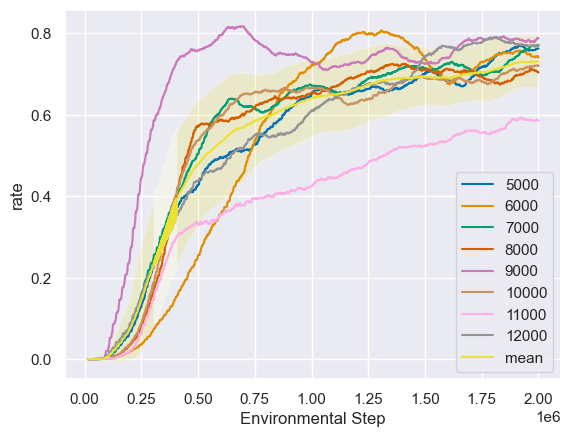

In [21]:
copo_r = 'exp_CoPO/CoPO_Inter_30agents_8workers_2M_8seeds_lr=3e-5'
plot_sep_mean(copo_r)

## SCPO

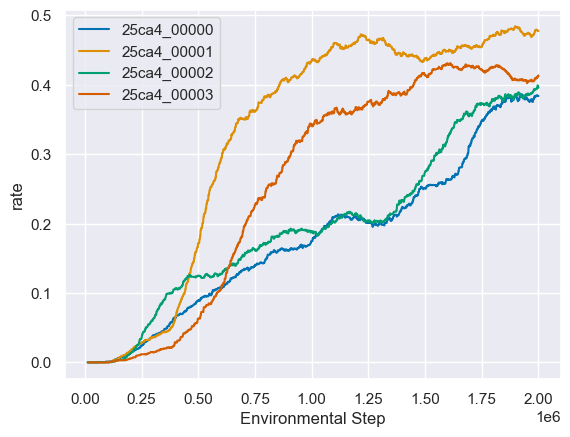

In [6]:
dd = 'exp_IPPO/IPPO_Inter_30agents_8workers_2M_lr=3e-5_tuning'
for p in [f'25ca4_0000{i}' for i in range(4)]:
    plot_one_exp(dd, param_pattern=p, exp_label=p)

In [4]:
rrr = 'exp_SCPO/SCPO_Round_40agents_8workers_2M_lr3e-5_tuning'
for p in [f'25ca4_0000{i}' for i in range(4)]:
    plot_one_exp(rrr, param_pattern=p, seeds=5000)

## ALL

IPPO, CCPPO, CoPO

### Inter.

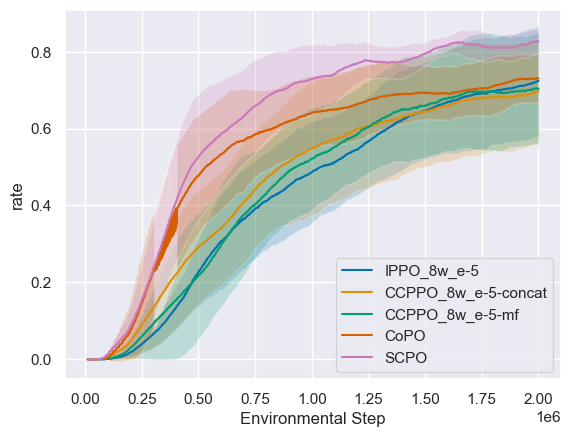

In [23]:
all_exp_inter = {
    # 'IPPO_8w_e-4':'exp_IPPO/IPPO_Inter_30agents_8workers_2M_lr=3e-4',
    'IPPO_8w_e-5': 'exp_IPPO/IPPO_Inter_30agents_8workers_2M_lr=3e-5', 
    # 'IPPO_3e-4': 'exp_IPPO/IPPO_Inter_30agents_4workers_2M_lr=3e-4',
    # 'CCPPO_8w_e-4': 'exp_CCPPO/CCPPO_Inter_30agents_8workers_2M_concat+mf_lr=3e-4',
    'CCPPO_8w_e-5': 'exp_CCPPO/CCPPO_Inter_30agents_8workers_2M_concat+mf_lr=3e-5',
    'CoPO': 'exp_CoPO/CoPO_Inter_30agents_8workers_2M_8seeds_lr=3e-5',
    'SCPO': 'exp_SCPO/SUCCESS/SCPO_Inter_30agents_2M_(8workers)_2e6_8seeds',
}
for algo_name, d in all_exp_inter.items():
    if 'CCPPO' not in algo_name:
        plot_one_exp(d, exp_label=algo_name)
    else:
        for p in ['concat', 'mf']:
            plot_one_exp(d, param_pattern=p, exp_label=f'{algo_name}-{p}')


#### Round.

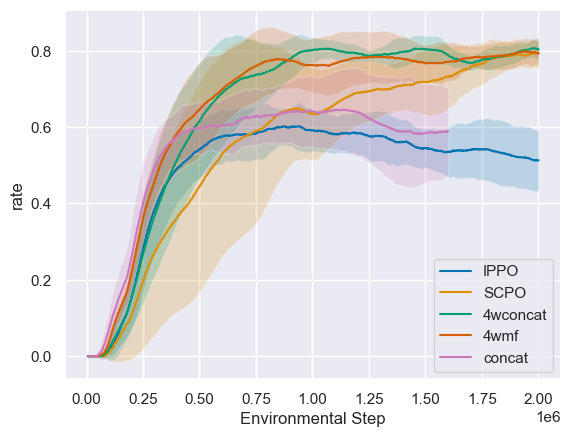

In [15]:
all_round = {
    'IPPO': 'exp_IPPO/IPPO_Round_40agents',
    'SCPO': 'exp_SCPO/SUCCESS/SCPO_Round_40agents_8workers_8seeds_2M_lr=3e-5',
}
for k, d in all_round.items():
    plot_one_exp(d, exp_label=k, title='Roundabout')

# ccppo_round_2m = 'exp_CCPPO/CCPPO_Round_40agents_8workers_2M_concat+mf_lr=3e-5'
# for p in ['concat', 'mf']:
#     plot_one_exp(ccppo_round_2m, param_pattern=p, exp_label=p)

ccppo_round_4w = 'exp_CCPPO/CCPPO_Round_40agents_4workers_2M_concat+mf_8seeds_lr=3e-5'
for p in ['concat', 'mf']:
    plot_one_exp(ccppo_round_4w, param_pattern=p, exp_label=f'4w{p}')

ccppo_round = 'exp_CCPPO/CCPPO_Round_40agents_concat_4workers_1.6M_lr=3e-4'
plot_one_exp(ccppo_round, exp_label='concat')

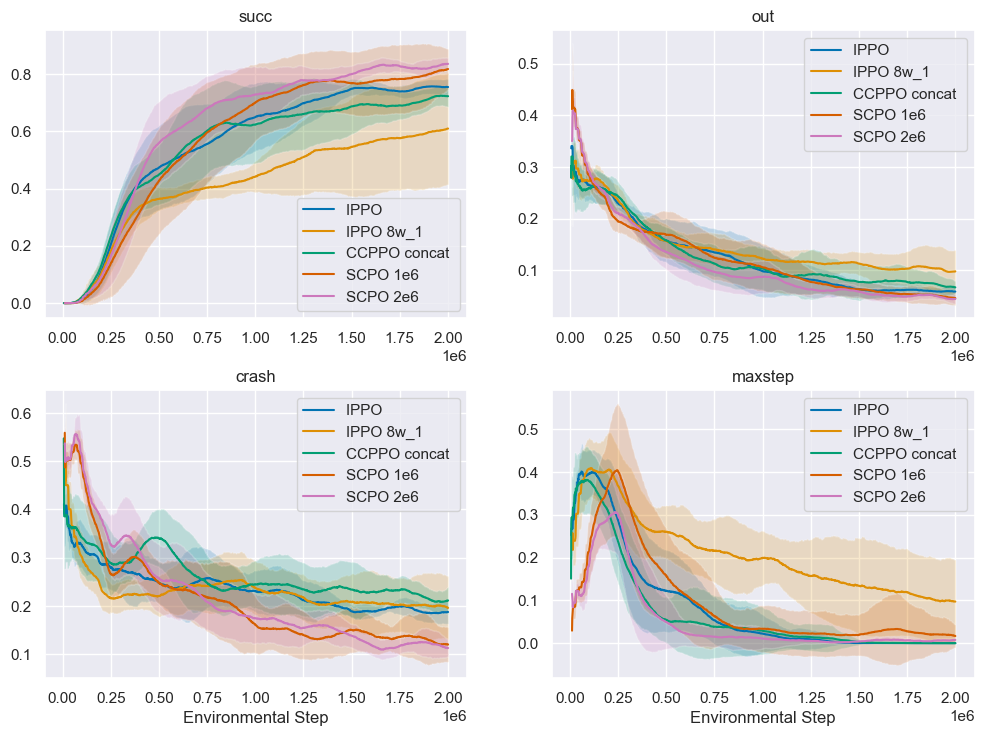

In [13]:
ippo_exp_dir = '../exp_IPPO/IPPO_Inter_30agents_4workers_2M'
ippo_exp_dir_8w_1 = '../exp_IPPO/IPPO_Inter_30agents_(8_workers)(no_norm_adv)'
ippo_exp_dir_8w_2 = '../exp_IPPO/IPPO_Inter_30agents_(8_workers)(no_norm_adv)_2'

# CCPPO
ccppo_concat_inter = '../exp_CCPPO/CCPPO_Inter_30agents_4workers_2M_concat'

copo_exp_dir_2m = '../exp_CoPO/CoPO_Inter_30agents_2M'
copo_exp_dir = '../exp_CoPO/CoPO_Inter_30agents_0'

scpo_exp_inter_1e6 = '../exp_SCPO/SUCCESS/SCPO_Inter_30agents_2M_(8workers)_1e6_8seeds' # ~81%
scpo_exp_inter_2e6 = '../exp_SCPO/SUCCESS/SCPO_Inter_30agents_2M_(8workers)_2e6_8seeds' # ~85%

exps = {
    ippo_exp_dir: dict(
        algo_name='IPPO',
    ),
    ippo_exp_dir_8w_1: dict(
        algo_name='IPPO',
        label='8w_1'
    ),
    ccppo_concat_inter: dict(
        algo_name='CCPPO',
        label='concat'
    ),

    scpo_exp_inter_1e6: dict(
        algo_name='SCPO',
        label='1e6'
    ),
    scpo_exp_inter_2e6: dict(
        algo_name='SCPO',
        label='2e6'
    ),
    # scpo_exp_inter: dict(
    #     algo_name='SCPO',
    #     seeds = [120000]
    #     # label=''
    # ),
#     ippo_exp_dir_8w_2: dict(
#         algo_name='IPPO',
#         label='8w_2'
#     ),
#     copo_exp_dir_2m: dict(
#         algo_name='CoPO',
#         label='2m'
#     ),
#     copo_exp_dir: dict(
#         algo_name='CoPO',
#     )
}
compare_all_metrics_for_multi_experiments(exps)

### SCPO 1e6 vs 2e6

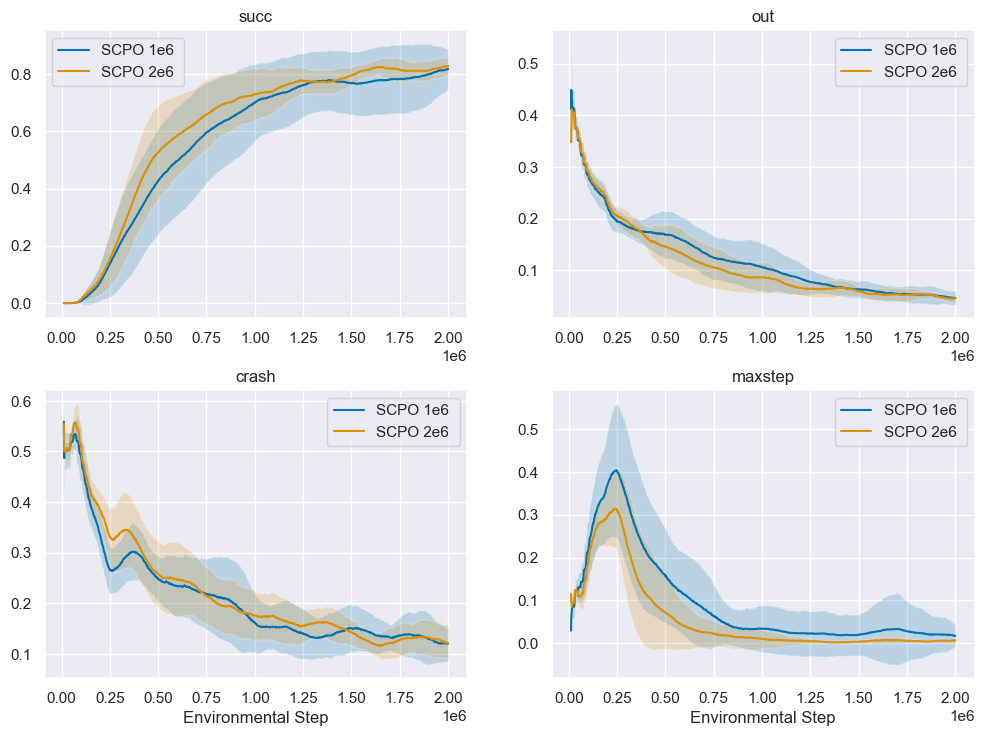

In [4]:
scpo_exp_inter_1e6 = 'exp_SCPO/SUCCESS/SCPO_Inter_30agents_2M_(8workers)_1e6_8seeds' # ~81%
scpo_exp_inter_2e6 = 'exp_SCPO/SUCCESS/SCPO_Inter_30agents_2M_(8workers)_2e6_8seeds' # ~85%
exps = {
    scpo_exp_inter_1e6: dict(
        algo_name='SCPO',
        label='1e6'
    ),
    scpo_exp_inter_2e6: dict(
        algo_name='SCPO',
        label='2e6'
    ),
}
compare_all_metrics_for_multi_experiments(exps)
# plot_one_exp(scpo_exp_inter_2e6, seeds=12000, exp_label='2e6_12000')

#